### For updated features based on the ppp_transformed_updated.csv

Transformations include:
- Converting Term from numeric/ordinal to categorical (less than 24, 24, between 24 and 60, 60, more than 60)
    - Justification: most concentrated around 24 and 60. the standard for ppp is 24 months, but can be extended to 60 months
    - Could also see it as whether a loan extension was applied
- Log transformation on large numeric variables
    - Normalises the data before standardising
    - MinMax shrinks the range but preserves the skew
    - shrinking 0-1B to 0-1 results in long decimals (eg. 0.988887622845627891), which usually gets binned together
    - new columns will be standardised as well
- Including dummy variables
- Splitting dataset based on original (non-categorical), encoded, scaled_standardised, log_standardised, dummy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv("ppp_transformed_updated.csv")
df_original = df.copy()
df.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'SBAOfficeCode',
       'ProcessingMethod', 'BorrowerName', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatus', 'Term', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'FranchiseName', 'ServicingLenderName',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'BusinessType', 'Gender', 'Veteran',
       'TOTAL_PROCEED', 'PROCEED_Diff', 'UTILITIES_PROCEED_pct',
       'PAYROLL_PROCEED_pct', 'MORTGAGE_INTEREST_PROCEED_pct',
       'RENT_PROCEED_pct', 'REFINANCE_EIDL_PROCEED_pct',
       'HEALTH_CARE_PROCEED_pct', 'DEBT_INTEREST_PROCEED_pct',
       'PROCEED_Per_Job', 'isAfterBiden', 'isDiffBorrowerAndProjectCity',
       'Industry', 'Subsector', 'ProcessingMethod_encoded',
       'LoanStatus_encoded', 'RuralUrbanIndicator_encoded',
       'HubzoneIndicator_encoded', 'LMIIndi

#### Converting 'Term' to categorical

In [ ]:
def term_transform(row):
    """
    Transforms 'Term' column into a new column with categorical (string) values
    > 60  : more than 60
    == 60 : 60
    > 24  : between 24 and 60
    == 24 : 24
    < 24  : less than 24
    """
    if row > 60:
        label = 'more_than_60'
    elif row == 60:
        label = 'is_60'
    elif row > 24:
        label = 'between_24_60'
    elif row == 24:
        label = 'is_24'
    else:
        label = 'less_than_24'
    return label

In [ ]:
# transform Term column into categorical
df['Term_cat'] = df['Term'].apply(term_transform)
df[['Term', 'Term_cat']].head(5)

,Term,Term_cat
0,24,is_24
1,24,is_24
2,24,is_24
3,24,is_24
4,24,is_24


In [ ]:
df['Term_cat'].value_counts()

is_24            623146
is_60            329485
less_than_24       4951
between_24_60      4300
more_than_60         10
Name: Term_cat, dtype: int64

In [ ]:
df['Term'].value_counts()

24     623146
60     329485
59       3145
4        1072
3         955
5         942
23        633
2         439
6         400
41        288
42        269
1         268
40        163
7          89
58         83
8          79
43         78
44         44
9          38
49         28
45         26
39         25
53         17
52         16
51         15
46         15
0          14
47         13
48         13
50         11
38         11
10          9
54          6
55          6
36          6
33          5
19          5
37          4
120         4
30          3
34          3
27          3
11          2
25          2
61          2
12          2
13          2
81          1
28          1
21          1
22          1
29          1
84          1
70          1
83          1
Name: Term, dtype: int64

### Log-transform 'InitialApprovalAmount','CurrentApprovalAmount','TOTAL_PROCEED','PROCEED_Per_Job','JobsReported'
'PROCEED_Diff' not log-transformed due to log(0) resulting in -inf, please use the original scaled_standard

In [ ]:
# following variables are significantly large in scale
big = ['InitialApprovalAmount','CurrentApprovalAmount','TOTAL_PROCEED','PROCEED_Per_Job','JobsReported']

for var in big:
    #df[f'log_{var}'] = np.log(df[var])
    df[f'log_{var}'] = [np.log(x) if x > 0 else 0 for x in df[var]]

Comparing columns before and after transformation, we expect the x-axis to be more manageable.

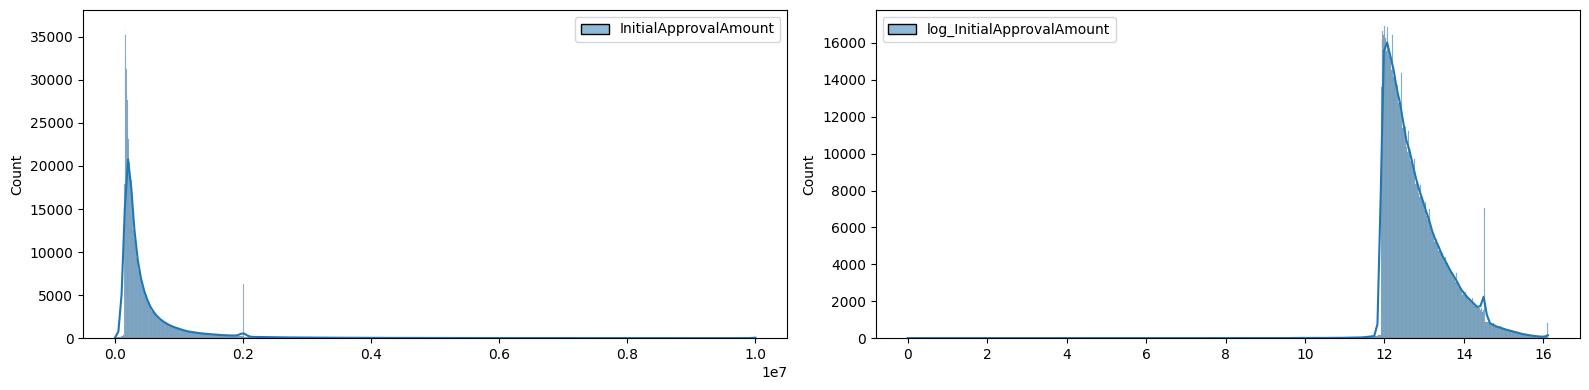

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

sns.histplot(df[['InitialApprovalAmount']], kde = True, ax = axes[0])
sns.histplot(df[['log_InitialApprovalAmount']], kde = True, ax = axes[1])
plt.tight_layout()
plt.show()

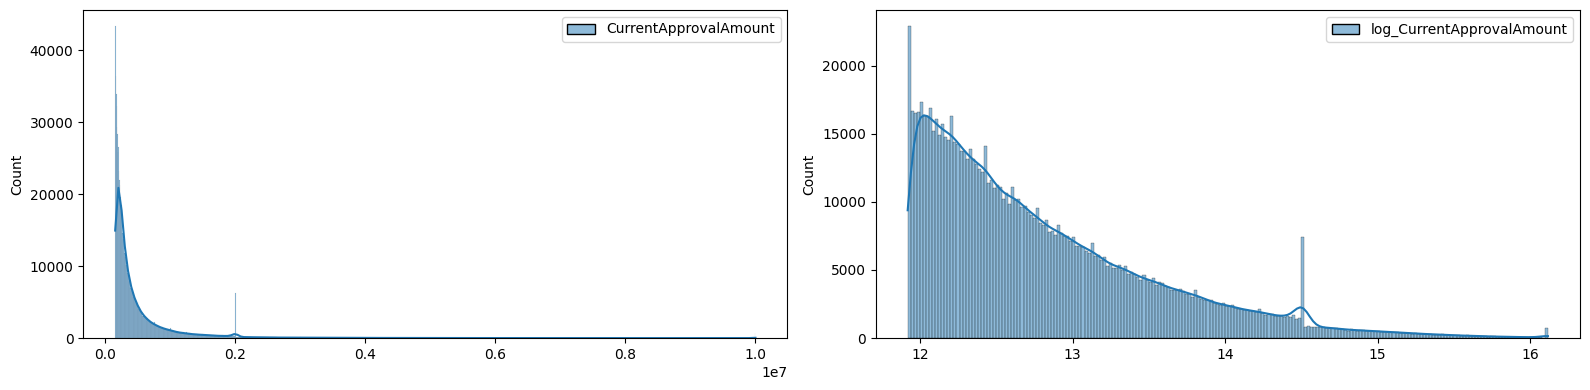

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

sns.histplot(df[['CurrentApprovalAmount']], kde = True, ax = axes[0])
sns.histplot(df[['log_CurrentApprovalAmount']], kde = True, ax = axes[1])
plt.tight_layout()
plt.show()

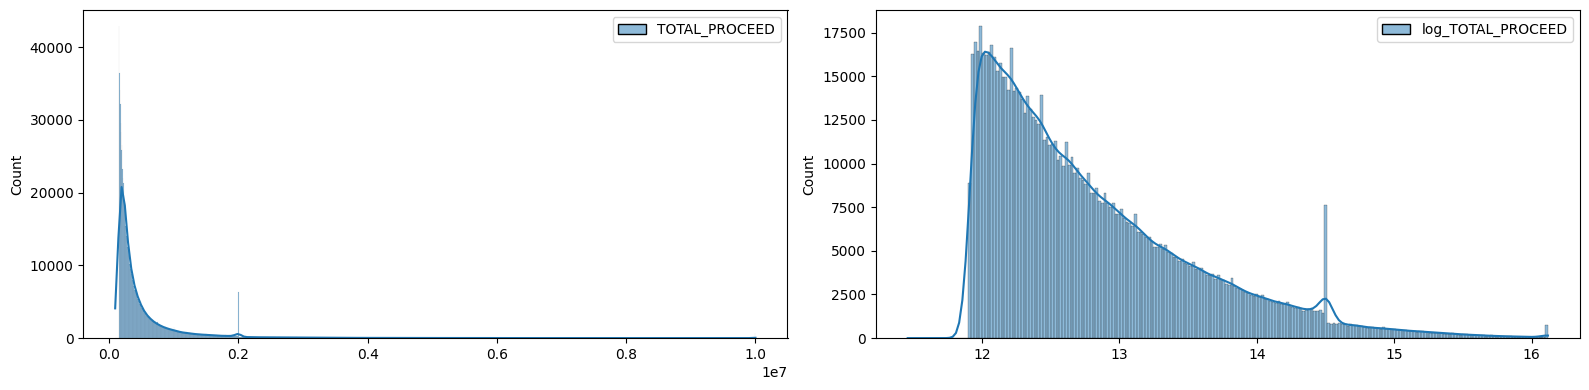

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

sns.histplot(df[['TOTAL_PROCEED']], kde = True, ax = axes[0])
sns.histplot(df[['log_TOTAL_PROCEED']], kde = True, ax = axes[1])
plt.tight_layout()
plt.show()

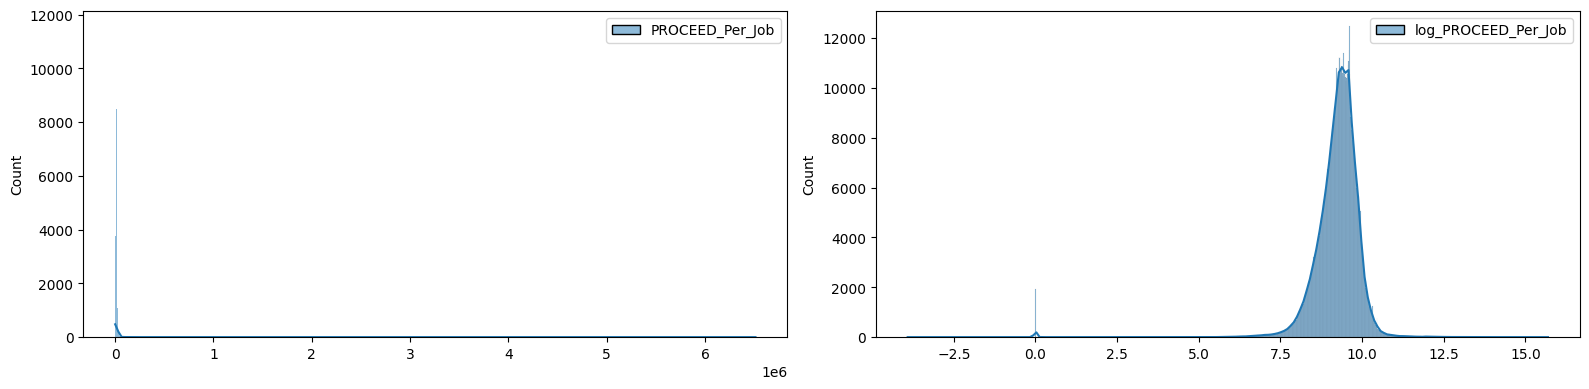

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

sns.histplot(df[['PROCEED_Per_Job']], kde = True, ax = axes[0])
sns.histplot(df[['log_PROCEED_Per_Job']], kde = True, ax = axes[1])
plt.tight_layout()
plt.show()

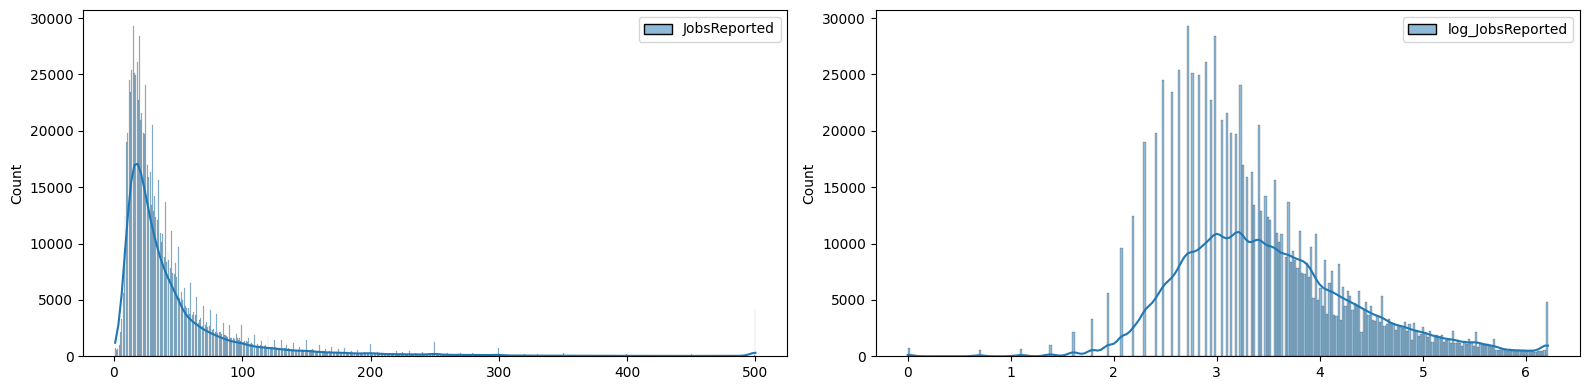

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

sns.histplot(df[['JobsReported']], kde = True, ax = axes[0])
sns.histplot(df[['log_JobsReported']], kde = True, ax = axes[1])
plt.tight_layout()
plt.show()

### Standardising log-transformed variables

In [ ]:
log_to_standardise = ['log_InitialApprovalAmount','log_CurrentApprovalAmount', 'log_TOTAL_PROCEED','log_PROCEED_Per_Job','log_JobsReported']

scaler = StandardScaler()

for field in log_to_standardise:
    df[f'{field}_standardised'] = scaler.fit_transform(df[[field]])

### Percentages variables transformation

Since all _pct variables are summed to 1 for each row, and noticing that most rows have 1 to PAYROLL_PROCEED_pct (indicating 100% allocation to payroll), we will take a ratio of proceeds that went to payroll versus proceeds that went to all other aspects.

The formula: ln((1+payroll_proceed_pct)/(1+sum(all other pct)))

1 is added to numerator and denominator to aid in calculation

In [ ]:
payroll_scaler = StandardScaler()

df['payroll_over_other'] = np.log((1+df['PAYROLL_PROCEED_pct'])/(1+df[['UTILITIES_PROCEED_pct','MORTGAGE_INTEREST_PROCEED_pct','RENT_PROCEED_pct',
                                                                       'REFINANCE_EIDL_PROCEED_pct','HEALTH_CARE_PROCEED_pct','DEBT_INTEREST_PROCEED_pct'
                                                                       ]].sum(axis=1)))

df['payroll_over_other'] = payroll_scaler.fit_transform(df['payroll_over_other'].values.reshape((-1, 1)))

Just for clarity, the dataframes will be split into

1. Original dataset as loaded (df_original)
2. Dataset as transformed up to now (df_new)

Lists of various variables are provided, please feel free to drop accordingly.

If your model requires dummy variables, please use the next section.

In [ ]:
# list of encoded variables
encoded = ['ProcessingMethod_encoded','LoanStatus_encoded','RuralUrbanIndicator_encoded','HubzoneIndicator_encoded','LMIIndicator_encoded',
           'BusinessAgeDescription_encoded','Race_encoded','Ethnicity_encoded','BusinessType_encoded','Gender_encoded','Veteran_encoded','Industry_encoded']

encoded_drop = ['ProcessingMethod_encoded','LoanStatus_encoded','RuralUrbanIndicator_encoded',
           'BusinessAgeDescription_encoded','Race_encoded','Ethnicity_encoded','BusinessType_encoded','Gender_encoded','Veteran_encoded','Industry_encoded']


# list of existing standardised variables - drop
standardised_drop = ['Term_standardised','JobsReported_standardised','UTILITIES_PROCEED_pct_standardised','PAYROLL_PROCEED_pct_standardised',
                'MORTGAGE_INTEREST_PROCEED_pct_standardised','RENT_PROCEED_pct_standardised','REFINANCE_EIDL_PROCEED_pct_standardised','HEALTH_CARE_PROCEED_pct_standardised',
                'DEBT_INTEREST_PROCEED_pct_standardised','InitialApprovalAmount_scaled_standardised','CurrentApprovalAmount_scaled_standardised','TOTAL_PROCEED_scaled_standardised',
                'PROCEED_Per_Job_scaled_standardised']

standardised_keep = ['PROCEED_Diff_standardised']

# list of log_transformed variables
logged = ['log_InitialApprovalAmount','log_CurrentApprovalAmount','log_TOTAL_PROCEED','log_PROCEED_Per_Job','log_JobsReported']

# list of log_transformed_standardised variables
log_standardise = ['log_InitialApprovalAmount_standardised','log_CurrentApprovalAmount_standardised','log_TOTAL_PROCEED_standardised',
                   'log_PROCEED_Per_Job_standardised','log_JobsReported_standardised']

# list of pct variables - drop
pct = ['PAYROLL_PROCEED_pct','UTILITIES_PROCEED_pct','MORTGAGE_INTEREST_PROCEED_pct','RENT_PROCEED_pct','REFINANCE_EIDL_PROCEED_pct','HEALTH_CARE_PROCEED_pct','DEBT_INTEREST_PROCEED_pct']

# list of commonly dropped varibles (please feel free to use your own)
drop = ['Unnamed: 0', 'LoanNumber','DateApproved','SBAOfficeCode','BorrowerName','BorrowerCity','BorrowerZip','Term','InitialApprovalAmount','CurrentApprovalAmount',
        'FranchiseName','ServicingLenderName','ServicingLenderZip', 'ProjectCity','NAICSCode','TOTAL_PROCEED','PROCEED_Diff']

# original dataframe from ppp_transformed_updated.csv
# df_original

# original dataframe with Term transformation, log transformation, log standardised and dummies -> new dataframe transformed up to now
df_new = df.copy()

In [ ]:
# drop columns that are not required in your model

### Creating dummy variables

In [ ]:
df = df # please add the dataframe you are using

dummies = ['BorrowerState', 'Term_cat','ProcessingMethod','LoanStatus','RuralUrbanIndicator',
          'BusinessAgeDescription','Race','Ethnicity','BusinessType','Gender',
           'Veteran','Industry']

df_with_dummies = df.copy()
df_with_dummies = pd.get_dummies(df_with_dummies, columns = dummies)

df_with_dummies.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'SBAOfficeCode',
       'BorrowerName', 'BorrowerCity', 'BorrowerZip', 'Term',
       'InitialApprovalAmount', 'CurrentApprovalAmount',
       ...
       'Industry_Mining, quarrying, and oil and gas extraction',
       'Industry_Nonclassifiable establishment',
       'Industry_Other services (except public administration) ',
       'Industry_Professional, scientific, and technical services',
       'Industry_Public service ',
       'Industry_Real estate and rental and leasing', 'Industry_Retail trade',
       'Industry_Transportation and warehousing', 'Industry_Utilities',
       'Industry_Wholesale trade'],
      dtype='object', length=208)

In [ ]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961892 entries, 0 to 961891
Columns: 208 entries, Unnamed: 0 to Industry_Wholesale trade
dtypes: float64(38), int64(20), object(11), uint8(139)
memory usage: 633.9+ MB


In [ ]:
df_with_dummies.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'SBAOfficeCode',
       'BorrowerName', 'BorrowerCity', 'BorrowerZip', 'Term',
       'InitialApprovalAmount', 'CurrentApprovalAmount',
       ...
       'Industry_Mining, quarrying, and oil and gas extraction',
       'Industry_Nonclassifiable establishment',
       'Industry_Other services (except public administration) ',
       'Industry_Professional, scientific, and technical services',
       'Industry_Public service ',
       'Industry_Real estate and rental and leasing', 'Industry_Retail trade',
       'Industry_Transportation and warehousing', 'Industry_Utilities',
       'Industry_Wholesale trade'],
      dtype='object', length=208)

In [ ]:
df_with_dummies.columns.tolist()

['Unnamed: 0',
 'LoanNumber',
 'DateApproved',
 'SBAOfficeCode',
 'BorrowerName',
 'BorrowerCity',
 'BorrowerZip',
 'Term',
 'InitialApprovalAmount',
 'CurrentApprovalAmount',
 'FranchiseName',
 'ServicingLenderName',
 'ServicingLenderZip',
 'HubzoneIndicator',
 'LMIIndicator',
 'ProjectCity',
 'JobsReported',
 'NAICSCode',
 'TOTAL_PROCEED',
 'PROCEED_Diff',
 'UTILITIES_PROCEED_pct',
 'PAYROLL_PROCEED_pct',
 'MORTGAGE_INTEREST_PROCEED_pct',
 'RENT_PROCEED_pct',
 'REFINANCE_EIDL_PROCEED_pct',
 'HEALTH_CARE_PROCEED_pct',
 'DEBT_INTEREST_PROCEED_pct',
 'PROCEED_Per_Job',
 'isAfterBiden',
 'isDiffBorrowerAndProjectCity',
 'Subsector',
 'ProcessingMethod_encoded',
 'LoanStatus_encoded',
 'RuralUrbanIndicator_encoded',
 'HubzoneIndicator_encoded',
 'LMIIndicator_encoded',
 'BusinessAgeDescription_encoded',
 'Race_encoded',
 'Ethnicity_encoded',
 'BusinessType_encoded',
 'Gender_encoded',
 'Veteran_encoded',
 'Industry_encoded',
 'Term_standardised',
 'JobsReported_standardised',
 'PROCEED_Di

In [ ]:
df_with_dummies.drop(columns=drop, inplace = True)
df_with_dummies.drop(columns=encoded_drop, inplace = True)
df_with_dummies.drop(columns=standardised_drop, inplace = True)
df_with_dummies.drop(columns=pct, inplace = True)



In [ ]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961892 entries, 0 to 961891
Columns: 161 entries, HubzoneIndicator to Industry_Wholesale trade
dtypes: float64(14), int64(5), object(3), uint8(139)
memory usage: 289.0+ MB


In [ ]:
df_with_dummies.columns

Index(['HubzoneIndicator', 'LMIIndicator', 'JobsReported', 'PROCEED_Per_Job',
       'isAfterBiden', 'isDiffBorrowerAndProjectCity', 'Subsector',
       'HubzoneIndicator_encoded', 'LMIIndicator_encoded',
       'PROCEED_Diff_standardised',
       ...
       'Industry_Mining, quarrying, and oil and gas extraction',
       'Industry_Nonclassifiable establishment',
       'Industry_Other services (except public administration) ',
       'Industry_Professional, scientific, and technical services',
       'Industry_Public service ',
       'Industry_Real estate and rental and leasing', 'Industry_Retail trade',
       'Industry_Transportation and warehousing', 'Industry_Utilities',
       'Industry_Wholesale trade'],
      dtype='object', length=161)

In [ ]:
df_with_dummies['payroll_over_other'].value_counts()

 0.335918     821996
-2.617949      36248
-2.046572      18366
-11.144927      1865
-0.878205       1753
               ...  
-8.693480          1
-6.217031          1
-6.117406          1
-10.454217         1
-4.014991          1
Name: payroll_over_other, Length: 2129, dtype: int64

In [ ]:
df_with_dummies.drop(columns=['HubzoneIndicator',
 'LMIIndicator', 'JobsReported',
 'PROCEED_Per_Job', 'log_InitialApprovalAmount',
 'log_CurrentApprovalAmount',
 'log_TOTAL_PROCEED',
 'log_PROCEED_Per_Job',
 'log_JobsReported', 'Subsector'], inplace=True)

In [ ]:
df_with_dummies.columns.tolist()

['isAfterBiden',
 'isDiffBorrowerAndProjectCity',
 'HubzoneIndicator_encoded',
 'LMIIndicator_encoded',
 'PROCEED_Diff_standardised',
 'isFraud',
 'log_InitialApprovalAmount_standardised',
 'log_CurrentApprovalAmount_standardised',
 'log_TOTAL_PROCEED_standardised',
 'log_PROCEED_Per_Job_standardised',
 'log_JobsReported_standardised',
 'payroll_over_other',
 'BorrowerState_AK',
 'BorrowerState_AL',
 'BorrowerState_AR',
 'BorrowerState_AS',
 'BorrowerState_AZ',
 'BorrowerState_CA',
 'BorrowerState_CO',
 'BorrowerState_CT',
 'BorrowerState_DC',
 'BorrowerState_DE',
 'BorrowerState_FL',
 'BorrowerState_GA',
 'BorrowerState_GU',
 'BorrowerState_HI',
 'BorrowerState_IA',
 'BorrowerState_ID',
 'BorrowerState_IL',
 'BorrowerState_IN',
 'BorrowerState_KS',
 'BorrowerState_KY',
 'BorrowerState_LA',
 'BorrowerState_MA',
 'BorrowerState_MD',
 'BorrowerState_ME',
 'BorrowerState_MI',
 'BorrowerState_MN',
 'BorrowerState_MO',
 'BorrowerState_MP',
 'BorrowerState_MS',
 'BorrowerState_MT',
 'Borrowe

In [ ]:
df_with_dummies.to_csv('/content/drive/MyDrive/ppp_transformed_new.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive


In [ ]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf



from tensorflow.python.keras.utils import np_utils
from keras.callbacks import EarlyStopping
# from keras.utils import np_utils
# from tensorflow.keras.utils import np_utils
from sklearn.utils.class_weight import compute_class_weight

from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
# from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten, Reshape
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
data1 = pd.read_csv("DMBA/ppp_transformed_new.csv")

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961892 entries, 0 to 961891
Columns: 152 entries, Unnamed: 0 to Industry_Wholesale trade
dtypes: float64(7), int64(145)
memory usage: 1.1 GB


In [ ]:
data1.columns.tolist()

['Unnamed: 0',
 'isAfterBiden',
 'isDiffBorrowerAndProjectCity',
 'HubzoneIndicator_encoded',
 'LMIIndicator_encoded',
 'PROCEED_Diff_standardised',
 'isFraud',
 'log_InitialApprovalAmount_standardised',
 'log_CurrentApprovalAmount_standardised',
 'log_TOTAL_PROCEED_standardised',
 'log_PROCEED_Per_Job_standardised',
 'log_JobsReported_standardised',
 'payroll_over_other',
 'BorrowerState_AK',
 'BorrowerState_AL',
 'BorrowerState_AR',
 'BorrowerState_AS',
 'BorrowerState_AZ',
 'BorrowerState_CA',
 'BorrowerState_CO',
 'BorrowerState_CT',
 'BorrowerState_DC',
 'BorrowerState_DE',
 'BorrowerState_FL',
 'BorrowerState_GA',
 'BorrowerState_GU',
 'BorrowerState_HI',
 'BorrowerState_IA',
 'BorrowerState_ID',
 'BorrowerState_IL',
 'BorrowerState_IN',
 'BorrowerState_KS',
 'BorrowerState_KY',
 'BorrowerState_LA',
 'BorrowerState_MA',
 'BorrowerState_MD',
 'BorrowerState_ME',
 'BorrowerState_MI',
 'BorrowerState_MN',
 'BorrowerState_MO',
 'BorrowerState_MP',
 'BorrowerState_MS',
 'BorrowerState

In [ ]:
data1.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
new_df1 = data1

In [ ]:
X = new_df1.drop(['isFraud'], axis = 'columns')
Label_Data = new_df1['isFraud']

In [ ]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(new_df1['isFraud'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(new_df1['isFraud'] == label)[0]

Counter({0: 961369, 1: 523})


In [ ]:
X.columns.tolist()

['isAfterBiden',
 'isDiffBorrowerAndProjectCity',
 'HubzoneIndicator_encoded',
 'LMIIndicator_encoded',
 'PROCEED_Diff_standardised',
 'log_InitialApprovalAmount_standardised',
 'log_CurrentApprovalAmount_standardised',
 'log_TOTAL_PROCEED_standardised',
 'log_PROCEED_Per_Job_standardised',
 'log_JobsReported_standardised',
 'payroll_over_other',
 'BorrowerState_AK',
 'BorrowerState_AL',
 'BorrowerState_AR',
 'BorrowerState_AS',
 'BorrowerState_AZ',
 'BorrowerState_CA',
 'BorrowerState_CO',
 'BorrowerState_CT',
 'BorrowerState_DC',
 'BorrowerState_DE',
 'BorrowerState_FL',
 'BorrowerState_GA',
 'BorrowerState_GU',
 'BorrowerState_HI',
 'BorrowerState_IA',
 'BorrowerState_ID',
 'BorrowerState_IL',
 'BorrowerState_IN',
 'BorrowerState_KS',
 'BorrowerState_KY',
 'BorrowerState_LA',
 'BorrowerState_MA',
 'BorrowerState_MD',
 'BorrowerState_ME',
 'BorrowerState_MI',
 'BorrowerState_MN',
 'BorrowerState_MO',
 'BorrowerState_MP',
 'BorrowerState_MS',
 'BorrowerState_MT',
 'BorrowerState_NC',


In [ ]:
X.head()

,isAfterBiden,isDiffBorrowerAndProjectCity,HubzoneIndicator_encoded,LMIIndicator_encoded,PROCEED_Diff_standardised,log_InitialApprovalAmount_standardised,log_CurrentApprovalAmount_standardised,log_TOTAL_PROCEED_standardised,log_PROCEED_Per_Job_standardised,log_JobsReported_standardised,...,"Industry_Mining, quarrying, and oil and gas extraction",Industry_Nonclassifiable establishment,Industry_Other services (except public administration),"Industry_Professional, scientific, and technical services",Industry_Public service,Industry_Real estate and rental and leasing,Industry_Retail trade,Industry_Transportation and warehousing,Industry_Utilities,Industry_Wholesale trade
0,0,0,0,0,-0.004199,0.985015,0.995606,0.995611,0.255028,0.715986,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,-0.004199,0.928765,0.938581,0.938587,-0.036805,0.904422,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,-0.004199,0.421815,0.424650,0.424659,1.176095,-0.533077,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,-0.004199,0.019799,0.017099,0.017109,0.494347,-0.331917,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,-0.004199,-0.125152,-0.129848,-0.129838,0.518176,-0.479404,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = Label_Data

In [ ]:
y.value_counts()

0    961369
1       523
Name: isFraud, dtype: int64

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y_arr = pd.Series.to_numpy(y)

In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
961887    0
961888    0
961889    0
961890    0
961891    0
Name: isFraud, Length: 961892, dtype: int64

In [ ]:
y_arr

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# weight_array = compute_class_weight('balanced', np.unique(y), y_arr)  # y is the array containing your labels
weight_array = compute_class_weight(class_weight='balanced', classes= np.unique(y), y= y_arr)
weight_dict = dict(zip(np.unique(y), weight_array))  # dictionary containing your weights

In [ ]:
weight_array

array([5.00272008e-01, 9.19590822e+02])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)
print(y_val.value_counts())
print(y_test.value_counts())


0    576821
1       314
Name: isFraud, dtype: int64
0    384548
1       209
Name: isFraud, dtype: int64
0    192274
1       104
Name: isFraud, dtype: int64
0    192274
1       105
Name: isFraud, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
std_scale = StandardScaler()
X_train_trans = std_scale.fit_transform(X_train)
X_test_trans = std_scale.transform(X_test)
X_val_trans = std_scale.transform(X_val)

In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_oversampled, Y_oversampled = oversample.fit_resample(X_train_trans, y_train)
# summarize the new class distribution
counter = Counter(Y_oversampled)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(Y_oversampled == label)[0]

Counter({0: 576821, 1: 576821})


In [ ]:
X_train.shape

(577135, 150)

In [ ]:
X_test.shape

(192379, 150)

In [ ]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
X_train=X_oversampled
val_X=X_val_trans




#-- new code --#
feature_shape = X_train.shape[1]
## Reshape input to be 3D [samples, timesteps, features] (format for LSTM)
X_train = X_train.reshape(X_train.shape[0], feature_shape) #
val_X = val_X.reshape(val_X.shape[0], feature_shape)


y_train=Y_oversampled


In [ ]:
X_train.shape[0]

1153642

In [ ]:
X_val.shape[0]

192378

In [ ]:
X_train.shape[1]

150

In [ ]:
feature_shape

150

In [ ]:
X_train.shape

(1153642, 150)

In [ ]:
# Create Sequential model
model = Sequential()

# Add layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Another way of implementing lstm
# inputs = Input((1, feature_shape))
# x1=LSTM(50,dropout=0.3,recurrent_dropout=0.2, return_sequences=True)(inputs)
# # print(x1.shape)
# x2=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(x1)
# outputs=Dense(1,activation='sigmoid')(x2)
# model=Model(inputs,outputs)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10000, validation_data=(X_val, y_val), class_weight=weight_dict)

Epoch 1/50
116/116 [==============================] - 7s 12ms/step - loss: 37.0613 - accuracy: 0.5234 - val_loss: 1.5684 - val_accuracy: 8.4209e-04
Epoch 2/50
116/116 [==============================] - 1s 6ms/step - loss: 0.8861 - accuracy: 0.5012 - val_loss: 1.5393 - val_accuracy: 0.0028
Epoch 3/50
116/116 [==============================] - 1s 6ms/step - loss: 0.7589 - accuracy: 0.5047 - val_loss: 1.4049 - val_accuracy: 0.0097
Epoch 4/50
116/116 [==============================] - 1s 6ms/step - loss: 0.6601 - accuracy: 0.5127 - val_loss: 1.2624 - val_accuracy: 0.0279
Epoch 5/50
116/116 [==============================] - 1s 6ms/step - loss: 0.5583 - accuracy: 0.5411 - val_loss: 1.0467 - val_accuracy: 0.1634
Epoch 6/50
116/116 [==============================] - 1s 6ms/step - loss: 0.4209 - accuracy: 0.6592 - val_loss: 0.7898 - val_accuracy: 0.5261
Epoch 7/50
116/116 [==============================] - 1s 6ms/step - loss: 0.2980 - accuracy: 0.8007 - val_loss: 0.5457 - val_accuracy: 0.8211


In [ ]:
model.save('ANN_v2_3Nov.h5')
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load Model

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('ANN_v2_3Nov.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                9664      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

Train: 0.999, Validation: 0.999


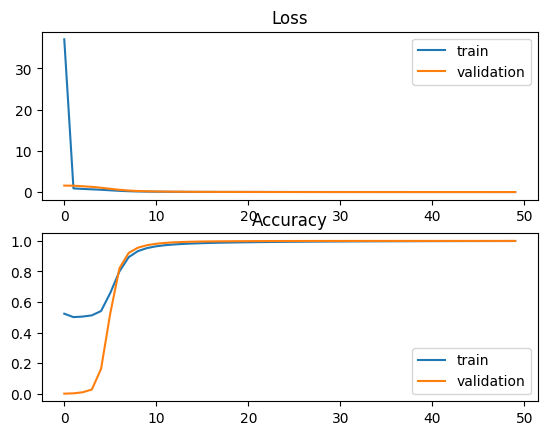

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
X_test_trans

array([[-0.65216856, -0.02195272, -0.60690882, ...,  5.37416896,
        -0.04877953, -0.23537639],
       [-0.65216856, -0.02195272, -0.60690882, ..., -0.18607528,
        -0.04877953, -0.23537639],
       [-0.65216856, -0.02195272, -0.60690882, ..., -0.18607528,
        -0.04877953, -0.23537639],
       ...,
       [-0.65216856, -0.02195272, -0.60690882, ..., -0.18607528,
        -0.04877953, -0.23537639],
       [ 1.53334591, -0.02195272,  1.64769396, ..., -0.18607528,
        -0.04877953, -0.23537639],
       [-0.65216856, -0.02195272, -0.60690882, ..., -0.18607528,
        -0.04877953, -0.23537639]])

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test_trans.shape)

(1153642, 150)
(192378, 150)
(192379, 150)


In [ ]:
X_test = X_test_trans.reshape(X_test_trans.shape[0], feature_shape)

In [ ]:
print(X_test.shape)

(192379, 150)


In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [ ]:
yhat_probs

array([2.8829008e-09, 5.1051720e-06, 1.9309315e-08, ..., 4.6596955e-11,
       2.9197684e-08, 1.2963822e-10], dtype=float32)

In [ ]:
predictions = model.predict(X_test)
preds = predictions > 0.5

6012/6012 [==============================] - 8s 1ms/step


In [ ]:
predictions

array([[2.8829008e-09],
       [5.1051720e-06],
       [1.9309315e-08],
       ...,
       [4.6596955e-11],
       [2.9197684e-08],
       [1.2963822e-10]], dtype=float32)

<ipython-input-48-bfe060d1fbf3>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_correct = np.int((corr_pred[0][0] + corr_pred[1][1]))
<ipython-input-48-bfe060d1fbf3>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecate

> Correct Predictions: 191893
> Wrong Predictions: 486
              precision    recall  f1-score   support

    NonFraud       1.00      1.00      1.00    192274
       Fraud       0.16      0.83      0.26       105

    accuracy                           1.00    192379
   macro avg       0.58      0.91      0.63    192379
weighted avg       1.00      1.00      1.00    192379



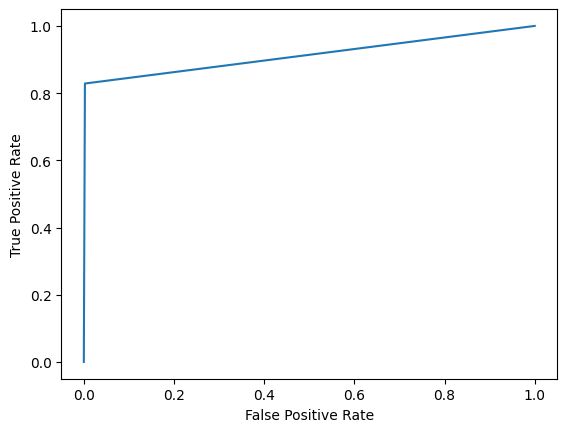

In [ ]:
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import RocCurveDisplay

corr_pred = metrics.confusion_matrix(y_test, preds)

n_correct = np.int((corr_pred[0][0] + corr_pred[1][1]))
print('> Correct Predictions:', n_correct)
n_wrongs = np.int((corr_pred[0][1] + (corr_pred[1][0])))
print('> Wrong Predictions:', n_wrongs)

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()

print(metrics.classification_report(y_test, preds,
                           target_names=["NonFraud", "Fraud"]))

In [ ]:
conf_matrix = confusion_matrix(y_test, preds)

In [ ]:
conf_matrix

array([[191806,    468],
       [    18,     87]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [ ]:
print(tn, fp, fn, tp)

191806 468 18 87


In [ ]:
accuracy = ((tp+tn)/(tp+tn+fp+fn))
precision = tp / (tp+fp)
recall = tp /(tp+fn)
f1_score = (2*precision*recall)/(precision+recall)

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1_score)

Accuracy score: 0.9974737367384174
Precision score: 0.15675675675675677
Recall score: 0.8285714285714286
F1 score: 0.2636363636363636


In [ ]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Assuming yhat_probs are probabilities ranging from 0 to 1
threshold = 0.5
yhat_classes = (yhat_probs >= threshold).astype(int)

# Now yhat_classes contains binary class labels (0 or 1)
accuracy = accuracy_score(y_test, yhat_classes)
precision = precision_score(y_test, yhat_classes)
recall = recall_score(y_test, yhat_classes)

print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)

Accuracy: 0.997474
Precision: 0.156757
Recall: 0.828571


In [ ]:
yhat_classes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.count()

192379

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=yhat_classes)


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Non Fraud','Fraud']

Confusion matrix, without normalization
[[191806    468]
 [    18     87]]


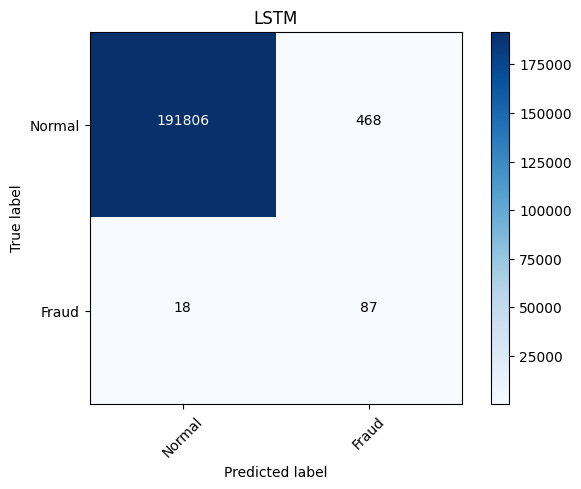

In [ ]:
plot_confusion_matrix(cm=cm, classes=labels, title='ANN')


<Axes: >

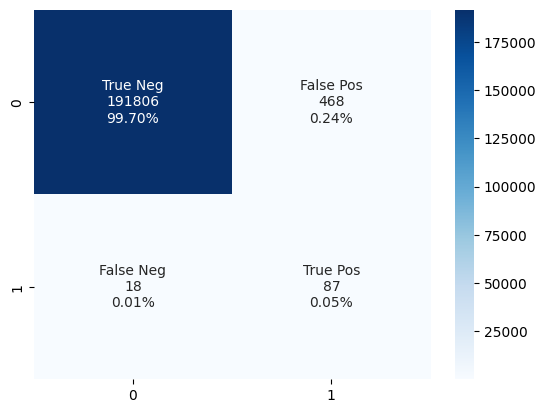

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')